# Задание 1
Импортировать данные о ежемесячных ценах на нефть марки Brent.
Подсчитать средние цены на нефть, минимальное и максимальное значение, среднеквадратическое отклонение в течение 5 лет после месяца вашего рождения.
Отобразить данные последнего года на графике. Результаты сохранить в виде блокнота Jupyter. 

Минимальная цена за последние 5 лет: 18.38
Максимальная цена за последние 5 лет: 122.71


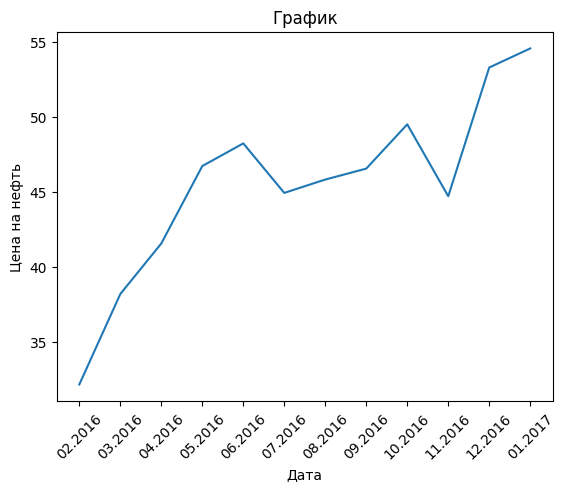

In [8]:
import numpy as np
from datetime import datetime
from matplotlib import pyplot as plt


def readfile() -> tuple[datetime|np.float64]:
    with open("brent-month_csv.csv", 'r') as file:
        data = file.read().split()[1:]
    for date, price in map(lambda x: x.split(','), data):
        date = datetime.strptime(date, '%Y-%m-%d')
        price = np.float64(price)
        yield date, price


def wiew_grap(data: tuple[datetime|np.float64]):
    dates, prices = [], []
    for d, p in data:
        dates.append(d.strftime("%m.%Y"))
        prices.append(p)
    plt.title("График")
    plt.xlabel("Дата")
    plt.ylabel("Цена на нефть")
    plt.xticks(rotation=45)
    plt.plot(dates, prices)
    plt.show()


if __name__ == '__main__':
    last_year_data = list()
    last_year_5_data = list()
    min_price = None
    max_price = None
    for date, price in readfile():
        if date > datetime(2016, 2, 1):
            last_year_5_data.append((date, price))
            if date < datetime(2017, 2, 1):
                last_year_data.append((date, price))
            if min_price is None:
                min_price = price
            elif min_price > price:
                min_price = price
            if max_price is None:
                max_price = price
            elif max_price < price:
                max_price = price
    print("Минимальная цена за последние 5 лет:", min_price)
    print("Максимальная цена за последние 5 лет:", max_price)
    wiew_grap(last_year_data)


# Задание 2
Импортировать данные о ценах на 4 криптовалюты (DataExplorer, скачать csv-файл за ноябрь).
Удалить все данные, кроме данных о цене (Close).
Построить парные графики для цен (Close) для криптовалют, построить карту корреляций. Результаты сохранить в виде блокнота Jupyter.